# Init

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sim

## Normal time serie

In [2]:
def func_normal_target(row):
    return row[['feature1', 'feature2']].values.dot(weights.T)

In [3]:
period = ['2020-01-01','2020-12-30']
date_times = pd.date_range(*period, freq='D')
n_samples = len(date_times)
np.random.seed(10)
X = np.random.randn(n_samples, 2)
data_df = pd.DataFrame(data=X, columns=[f'feature{idx+1}' for idx in range(X.shape[1])],
                      index=date_times)
weights = np.array([1, 2])
data_df['target'] = data_df.apply(func_normal_target, axis=1)
data_df.index.name = 'date_times'

In [4]:
def ts_overview(data_df, target='target'):
    fig = plt.figure(figsize=(10, 4))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)

    data_df[target].plot(ax=ax1)
    ax1.set_xlabel('Time')
    ax1.set_ylabel(f'{target}')

    data_df[target].hist(bins=30, ax=ax2)
    ax2.set_xlabel('Count')
    ax2.set_ylabel(f'{target}')

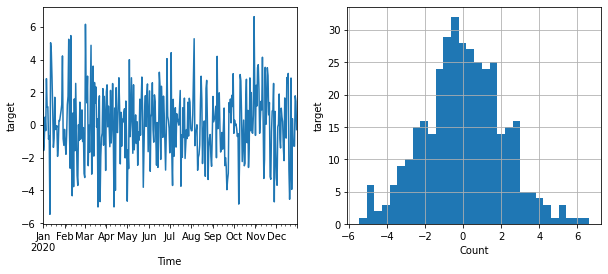

In [5]:
ts_overview(data_df)

See how the target follows a normal distribution.

In [6]:
from scipy import stats

In [7]:
stats.normaltest(data_df['target'])

NormaltestResult(statistic=0.6774865610704066, pvalue=0.7126653806822446)

This is expected as our independent variable 'feature1' and 'feature2' is normal distributed.

## Break point due to one offset in X

In [8]:
def func_breaked_target(row):
    return row[['feature1', 'feature2_breaked']].values.dot(weights.T)

In [9]:
break_point = date_times[int(len(date_times)/2)]
mask = data_df.index > break_point
off_set = 2
data_df['feature2_breaked'] = data_df['feature2']
data_df.loc[mask,'feature2_breaked'] += off_set
#data_df['feature2'] += 2 

In [10]:
stats.normaltest(data_df['feature2_breaked'])

NormaltestResult(statistic=4.1388521003231755, pvalue=0.1262582268019954)

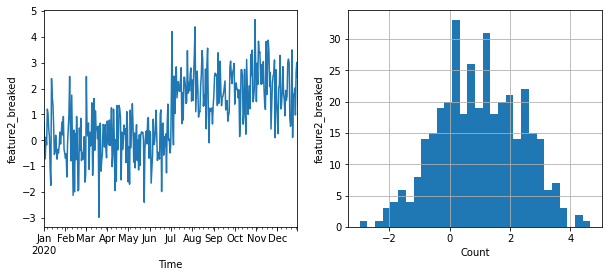

In [11]:
ts_overview(data_df, target='feature2_breaked')

In [12]:
data_df['target_shifted_feature2'] = data_df.apply(func_breaked_target, axis=1)

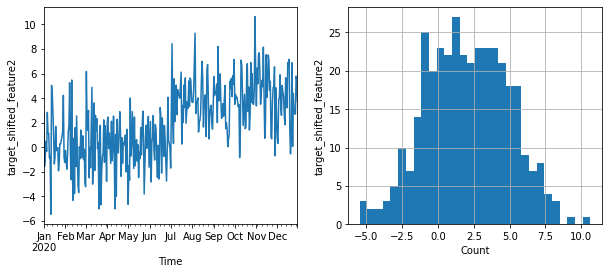

In [13]:
ts_overview(data_df, target='target_shifted_feature2')

In [14]:
stats.normaltest(data_df['target_shifted_feature2'])

NormaltestResult(statistic=2.503103169674387, pvalue=0.28606060505134906)

# Backup

In [15]:
import os

In [20]:
data_df.index.name

'date_times'

In [21]:
DATA_DIR='../data'
save_sim_path = os.path.join(DATA_DIR, 'sim_normal_offset.csv')
data_df.to_csv(save_sim_path, sep=';')